In [537]:
import os
import sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [690]:
def sin_wave(A, f, fs, phi, t, seed):
    '''
    params A: amplitude
    params f: frequency
    params fs: frequency sample rate
    params phi: phase
    params t: time
    '''
    random.seed(seed)
    Ts = 1/fs #采样时间间隔
    n = t/Ts
    y = A*np.sin(2*np.pi*(f + 0.4*random.random() -0.2)*t + phi*(np.pi/180)) + random.random()
    return y

In [691]:
for i in range(1000):
    seed = i
    fs = 512
    time = np.arange(-1,1,1/fs)
    chan1 = sin_wave(A = 1, f = 0.25, fs = fs, phi = 90, t = time, seed = seed)
    chan2 = sin_wave(A = 0.8, f = 0.2, fs = fs, phi = 100, t = time, seed = seed)
    chan3 = sin_wave(A = 0.9, f = 0.3, fs = fs, phi = 70, t = time, seed = seed)

    mat_tmp = np.array([[time,chan1],[time,chan2],[time,chan3]])


    mat_tmp = np.mean(mat_tmp, axis = 0)
    
    mat_tmp = mat_tmp.transpose(1,0)
    
    mat_tmp = np.expand_dims(mat_tmp, axis = 2)
    if i == 0:
        mat = mat_tmp
    else:
        mat = np.concatenate((mat,mat_tmp),axis = 2)

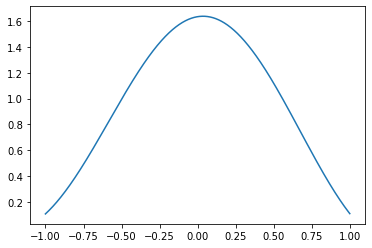

In [693]:
plt.plot(mat[:,0,0],mat[:,1,0])

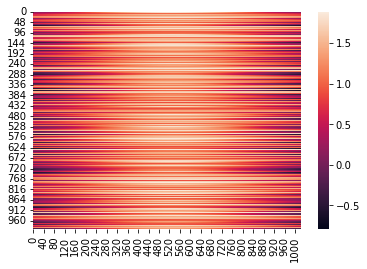

In [700]:
values = mat[:,1:,]
values = np.squeeze(values, axis=1)
values = values.transpose(1,0)
ax = sns.heatmap(values)

In [695]:
def sliding_window(data, sw_width, start, end, step):
    start = start - data[0,0]
    end = end - data[0,0]
    
    n_start = round(start * fs)
    
    n_end = round(end * fs)
    
    n_sw_width = round(sw_width * fs)
    
    n_step = round(step * fs)
    
    slopes = np.array([])
    
    sw_end = (n_start + n_sw_width)/fs
    
    while sw_end <= end:

        sw_sample = data[n_start:n_start + n_sw_width,1]

        sw_time = data[n_start:n_start + n_sw_width,0]

        slope = np.polyfit(sw_time,sw_sample,1)

        slopes = np.append(slopes,slope[0])

        n_start = n_start + n_step

        n_end = n_start + n_step + n_sw_width 

        sw_end = n_end/fs
    
    return slopes

In [696]:
def permutation(data, nsample, niter, p):
    data = list(data)
    
    boost_slope_means = np.array([])
    
    for i in range(niter):
        
        boost_slope = random.sample(data, nsample)
    
        boost_slope_mean = np.mean(boost_slope)
    
        boost_slope_means = np.append(boost_slope_means,boost_slope_mean)   
    
    boost_slope_means_per = sorted(boost_slope_means)
    
    value_sig = boost_slope_means_per[round(niter - niter*p)]
    
    data = np.array(data)
    for i in range(len(data)):
        if data[i] >= value_sig:
            pass
        else:
            data[i] = np.nan
    
    return data

In [697]:
for i in range(mat.shape[2]):
    slopes_tmp = sliding_window(mat[:,:,i], sw_width = 0.1, start = -1, end = 1, step = 0.01)
    slopes_tmp = permutation(data = slopes_tmp, nsample = 50, niter = 5000, p =0.05)
    slopes_tmp = np.expand_dims(slopes_tmp, axis = 1)
    if i == 0:
        slopes = slopes_tmp
    else:
        slopes = np.concatenate((slopes,slopes_tmp),axis = 1)

In [698]:
slopes = slopes.transpose(1,0)

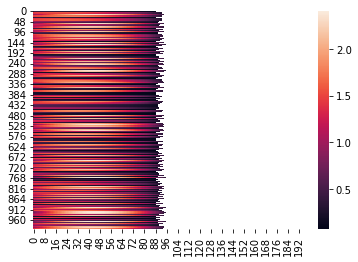

In [699]:
ax = sns.heatmap(slopes)